# Linear Algebra

## Vectors
Numbers can be thought of as 1 dimensional representations of where we are on the number line. Vectors are an extension of this intuition about numbers to multiple dimensions. With one number, I can represent how far away I am from an object (I am 1 meter North of the South wall). But I can specify more about my location by using more reference points (I am 1 meter North of the south wall and 1 meter East of the West wall). Instead of specifying where I am on a line, I am now specifying in terms of the plane.
![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Basis_graph_%28no_label%29.svg/400px-Basis_graph_%28no_label%29.svg.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

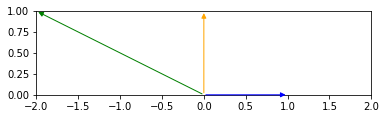

In [2]:
def plot_vectors(vectors, colors, axis):
    for vector, color in zip(vectors, colors):
        axis.annotate("", xy=vector, xytext=(0, 0), arrowprops=dict(arrowstyle="-|>", color=color))

blue = np.array([1, 0])
orange = np.array([0, 1])
green = np.array([-2, 1])

fig, ax = plt.subplots()
plot_vectors([blue, orange, green], ["blue", "orange", "green"], ax)
plt.xlim([-2, 2])
ax.set_aspect('equal')

Vectors can be added, multiplied and subtracted. They can also be added to, multiplied with, subtracted from, and divided by normal numbers. 

Addition: $$\begin{bmatrix} 0 & 1 \end{bmatrix} + \begin{bmatrix} 2 & 0 \end{bmatrix} = \begin{bmatrix} 2 & 1 \end{bmatrix} \qquad \begin{bmatrix} 0 & 1 \end{bmatrix} + 2 = \begin{bmatrix} 2 & 3 \end{bmatrix}$$

Multplication: $$\begin{bmatrix} 0 & 1 \end{bmatrix} \cdot \begin{bmatrix} 2 \\ 1 \end{bmatrix} = 2\cdot0 + 1\cdot1 = 1 \qquad \begin{bmatrix} 0 & 1 \end{bmatrix} \cdot 2 = \begin{bmatrix} 0 & 2 \end{bmatrix}$$

In [3]:
print(blue + orange)
print(orange - green + 2)
print(blue / 5)

[1 1]
[4 2]
[0.2 0. ]


## Matrices
Vectors can also be thought of as 1D. If we want to specify the locations of one person in a room, we can give a vector like $[0 \text{ } 1]$. When we want to specify where every person is, we can use a matrix 
$$
\left.
\begin{bmatrix} 
0 & 1 \\ 0 & 2\\ \vdots & \vdots \\ 1 & 5 
\end{bmatrix}
\right\}n
$$
This matrix is called $n \times 2$ because it has $n$ rows and 2 columns.

### Matrix Multiplication

Matrix multiplication is different than vector multiplication. For starters, the order matters.
This means $\mathbf{A}\mathbf{B}\neq\mathbf{B}\mathbf{A}$. The only legal matrix multiplications occur when the 2 matrices $\mathbf{A}$ and $\mathbf{B}$ are of particular shape. If $\mathbf{A}$ is $1\times2$ then $\mathbf{B}$ must be $2\times k$.

Here's an example where $\mathbf{A}$ is $2\times2$ and $\mathbf{B}$ is $2\times 3$:
$$
\begin{bmatrix} 
0 & 1 \\
1 & 0
\end{bmatrix}
\begin{bmatrix} 
1 & 7 & 4\\
2 & 9 & 4\\
\end{bmatrix}
=
\begin{bmatrix} 
2 & 9 & 4\\
1 & 7 & 4\\
\end{bmatrix}
$$

In [4]:
np.array([[0, 1], [1, 0]]) @ np.array([[1, 7, 4], [2, 9, 4]])

array([[2, 9, 4],
       [1, 7, 4]])

### Inverses
There is a very special matrix called the identity. It is defined as $$\mathbf{I^{2 \times 2}} = \begin{bmatrix}1 & 0 \\ 0 & 1 \end{bmatrix}$$ or in general 
$$\mathbf{I} = 
\begin{bmatrix}
1 & 0 & \cdots & 0 \\
0 & 1 & \cdots & 0 \\
\vdots &\vdots & \ddots & \vdots\\
0 & 0 & \cdots & 1
\end{bmatrix}$$
Their special property is that for any matrix $\mathbf{A}$, $\mathbf{I}\mathbf{A} = \mathbf{A}\mathbf{I} = \mathbf{A}$. Basically, it acts like 1. When we look to find an inverse in the normal numbers, we ask what number when multiplied by $a$ gives me 1? That number is of course $a^{-1} = \frac{1}{a}$. Our problem here of course is that we cannot divide matrices. However, we can still attempt to solve the system $\mathbf{A}^{-1}\mathbf{A} = \mathbf{I}$. We won't go into the details of computing this matrix, but just know that the matrix sometimes exists and sometimes doesn't, depending on the nature of how $\mathbf{A}$ multplies vectors. Let's do some examples.

In [5]:
A = np.array([[2, 3], [7, -3]])
A_inv = np.linalg.inv(A)
A_inv

array([[ 0.11111111,  0.11111111],
       [ 0.25925926, -0.07407407]])

In [6]:
np.round(A @ A_inv)

array([[1., 0.],
       [0., 1.]])

If we can write an equation as $\mathbf{A}\vec{x} = \vec{b}$, we can solve for $\vec{x}$ by doing the following:
$$
\mathbf{A}\vec{x} = \vec{b} \\
\mathbf{A}^{-1}\mathbf{A}\vec{x} = \mathbf{A}^{-1}\vec{b} \\
\mathbf{I}\vec{x} = \mathbf{A}^{-1}\vec{b} \\
\vec{x} = \mathbf{A}^{-1}\vec{b}
$$

For example, consider the system $$ \begin{cases} 2x + 3y = 8 \\ 7x + -3y = 1 \end{cases}$$
We can use $\mathbf{A}$ as defined previously and define $\vec{b} = \begin{bmatrix} 8 \\ 1\end{bmatrix}$.

In [7]:
b = np.array([[8], [1]])
print('x = {0[0]:.0f}\ny = {0[1]:.0f}'.format(np.ravel(A_inv @ b)))
A_inv @ b

x = 1
y = 2


array([[1.],
       [2.]])

## Tensors
Like the transition from numbers to vectors, or vectors to matrices, the transition from matrix to tensor is simply an increase in dimensionality. If we imagine a vector to be a line of numbers, a matrix to be a rectangle of numbers, then we can imagine the tensor as a cube or a rectangular prism, where each cube composing it is a number. My favorite way of thinking about it is this: a pixel is a number representing its color, an image is a 2 dimensional grid of such numbers (a matrix), and a video is the image through time:

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQId0fHPd2lK3_tdBTnrjpbevPCFFQpszxoVhuolmK9nqSXgAMW)

## Systems of Equations and Linear Regression
Matrix multiplication gives us a convenient way to write a system of linear equations. Consider, for example, the system 
$$ \begin{cases} mx_1 + b = y_1 \\ mx_2 + b = y_2 \end{cases}$$
It's simple to show that this can be written in the matrix notation: 
$$\mathbf{X}\vec{\beta} = \vec{y}$$ 
where 
$$\mathbf{X} = \begin{bmatrix}1 & x_1 \\ 1 & x_2 \end{bmatrix}; \quad \vec{\beta} = \begin{bmatrix} b \\ m\end{bmatrix}; \quad \vec{y} = \begin{bmatrix}y_1 \\ y_2 \end{bmatrix}$$
Since the unknown vector is $\vec{\beta}$, we can solve for it simply using the inverse: $$\vec{\beta} = \mathbf{X}^{-1}\vec{y}$$
Our only problem here is that usually linear regression systems have many more rows (data points) and potentially more regressors. We consider $n$ rows of data and $m$ regressors:
$$ \begin{cases} 
\beta_0 + \beta_1x_{1,1} + \beta_2x_{1,2} + \cdots + \beta_mx_{1,m}  = y_1 \\
\beta_0 + \beta_1x_{2,1} + \beta_2x_{2,2} + \cdots + \beta_mx_{2,m}  = y_2 \\
\vdots \\
\beta_0 + \beta_1x_{n,1} + \beta_2x_{n,2} + \cdots + \beta_mx_{n,m}  = y_n
\end{cases}$$
Conveniently, we can still write this as 
$$\mathbf{X}\vec{\beta} = \vec{y}$$
where 
$$\mathbf{X} = 
\begin{bmatrix}
1 & x_{1,1} & \cdots & x_{1,m}\\
1 & x_{2,1} & \cdots & x_{2,m}\\
\vdots & \vdots & & \vdots \\
1 & x_{n,1} & \cdots & x_{n,m}
\end{bmatrix};
\quad
\vec{\beta} = 
\begin{bmatrix} 
\beta_0 \\
\beta_1 \\
\vdots \\ 
\beta_m
\end{bmatrix}; 
\quad 
\vec{y} = 
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}$$

In [8]:
df_soccer = pd.read_csv("epldata_final.csv", converters={'fpl_sel':lambda x:float(x.strip('%'))/100})
df_soccer.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,0.171,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,0.056,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,0.059,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,0.015,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.007,121,2.0,France,0,4,1,1,0


In [9]:
y = df_soccer["market_value"]
x = df_soccer[["age", 
               "position_cat", 
               "page_views", 
               "fpl_value", 
               "fpl_sel", 
               "fpl_points", 
               "region", 
               "new_foreign", 
               "age_cat",
               "club_id",
               "big_club",
               "new_signing"
              ]]
x.insert(0, "intercept", 1)
x.head()

,intercept,age,position_cat,page_views,fpl_value,fpl_sel,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
0,1,28,1,4329,12.0,0.171,264,3.0,0,4,1,1,0
1,1,28,1,4395,9.5,0.056,167,2.0,0,4,1,1,0
2,1,35,4,1529,5.5,0.059,134,2.0,0,6,1,1,0
3,1,28,1,2393,7.5,0.015,122,1.0,0,4,1,1,0
4,1,31,3,912,6.0,0.007,121,2.0,0,4,1,1,0


In [10]:
X = x.to_numpy()
y_vec = y.to_numpy()
np.set_printoptions(threshold=10)
print("X:", X, "\ny:", y_vec)

X: [[ 1. 28.  1. ...  1.  1.  0.]
 [ 1. 28.  1. ...  1.  1.  0.]
 [ 1. 35.  4. ...  1.  1.  0.]
 ...
 [ 1. 23.  3. ... 20.  0.  0.]
 [ 1. 21.  1. ... 20.  0.  1.]
 [ 1. 27.  1. ... 20.  0.  0.]] 
y: [65.  50.   7.  ...  4.5  1.  10. ]


In [11]:
betas = np.linalg.lstsq(X[:, [0, 3]], y_vec, rcond=None) # intercept, page_views
betas[0]

array([3.58065857, 0.00972978])

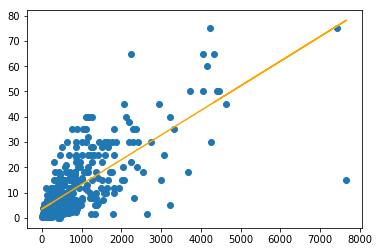

In [12]:
plt.scatter(X[:, 3], y_vec)
plt.plot(X[:, 3], betas[0][0] + betas[0][1]*X[:, 3], color="orange")

In [13]:
betas = np.linalg.lstsq(X[:, [0, 1, 3, 4, 5]], y_vec, rcond=None) # intercept, age, page_views, fpl_value, fpl_sel, fpl_points
betas[0]

array([-1.14028418e+01, -2.15231856e-01,  4.03036928e-03,  4.42546469e+00,
        3.07053017e+01])

## Natural Language Processing: Encoding Language as Vectors
NLP-focused machine learning is a huge area of both study and practice; sentiment analysis, topic modelling, document classification are among the tasks that we expect machine learning will perform well at. But how does a computer come to understand what a word is?

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/1200px-Colored_neural_network.svg.png" alt="drawing" width="350"/>

Looking at the structure of a standard neural network, we need to pass in a vector and recieve a vector as output. So how do we represent characters, words, and texts in this manner? We begin by describing a space where each word of a text is represented in the coordinate system. We also understand that where a word appears in a corpus is related to its meaning.

![](https://cdn-images-1.medium.com/max/1600/1*ULfyiWPKgWceCqyZeDTl0g.png)

One the first approaches, and not a bad one, is a binary one-hot encoding of each of the unique words in the corpus. This gives a distinct way to write each of the words in the corpus as a vector.

Bag of words approaches just look at the frequencies of words and are usually used for topic modelling. However, it can be extended to include limited context in $n$-gram models, by looking instead at frequency of $n$-length phrases.

However, these kinds of encoding ignores meanings of words. Thus, we consider the co-occurence of a word with related words to be important to the meaning of that word. For these dense representations models in the Word2vec family are used to reduce the dimenstionality of these datasets. These approaches make similar words have representations that are similar in the vector space, that is, the vectors are close together.